# Notebook with data visualization to understand skew in the protected attributes and label on adult data (for a unique file)

### Imports

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from falsb4mpa.dataset.load_data import load_data

### Adult data

In [2]:
data = pd.read_csv("../../data/processed/adult/adult.csv", index_col='Unnamed: 0')

In [3]:
len(data.index)

45222

In [4]:
data.head()

,age_ 18,age_ 25,age_ 30,age_ 35,age_ 40,age_ 45,age_ 50,age_ 55,age_ 60,age_ 65,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,sex,income
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
data['sex'].value_counts()

sex
False    30527
True     14695
Name: count, dtype: int64

/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/644134783.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [sex[0], train_counts[0]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/644134783.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [sex[1], train_counts[1]]


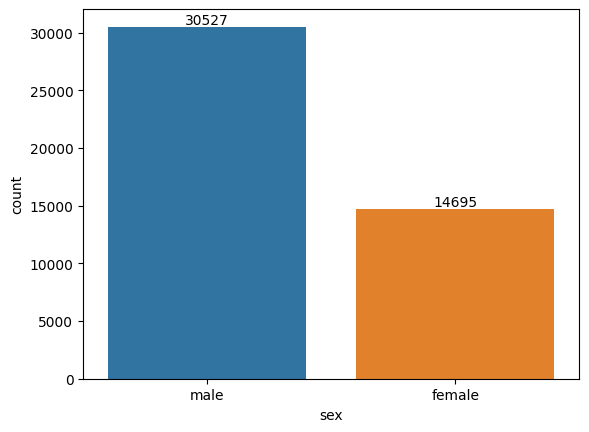

In [6]:
cols = ['sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='sex',y='count',data=res_df,hue='sex', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()


In [7]:
data['income'].value_counts()

income
False    34014
True     11208
Name: count, dtype: int64

/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/2236805518.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [income[0], train_counts[0]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/2236805518.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [income[1], train_counts[1]]


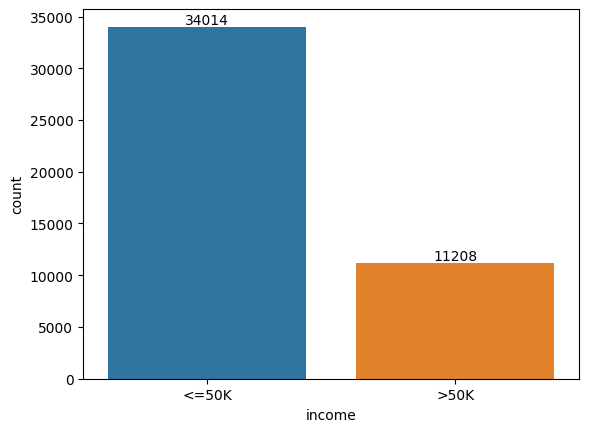

In [8]:
cols = ['income', 'count']
income = ['<=50K', '>50K']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['income'].value_counts()
train_df = pd.DataFrame(
    data=[
        [income[0], train_counts[0]],
        [income[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='income',y='count',data=res_df,hue='income', dodge=False)
# plt.legend(loc="upper right")
plt.legend([], frameon=False)
plt.show()

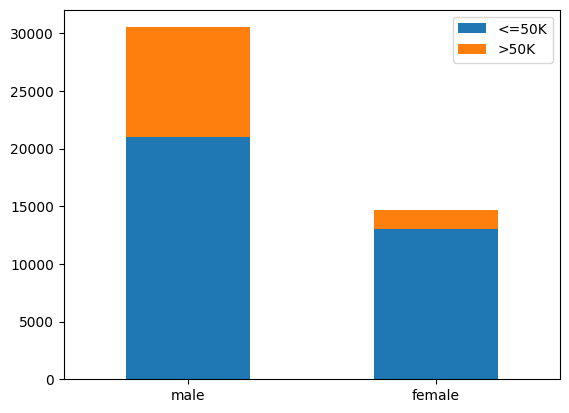

In [9]:
great_income = data[data['income'] == 1]
man_great = len(great_income[great_income['sex'] == 0].index)
woman_great = len(great_income[great_income['sex'] == 1].index)

lower_income = data[data['income'] == 0]
man_low = len(lower_income[lower_income['sex'] == 0].index)
woman_low = len(lower_income[lower_income['sex'] == 1].index)


res_df = pd.DataFrame(
    {
        '<=50K': [man_low, woman_low],
        '>50K': [man_great, woman_great],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/2854881609.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [races[0], train_counts[0]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/2854881609.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [races[1], train_counts[1]],
/var/folders/nx/ktkztyln3xn8f8j2qrfpjrlh0000gn/T/ipykernel_8307/2854881609.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

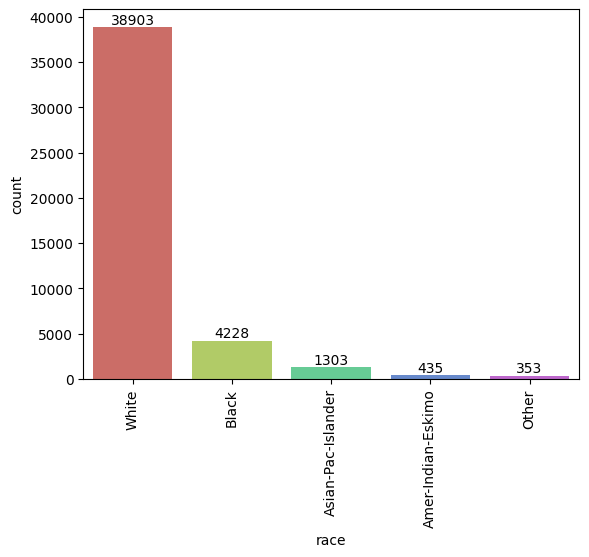

In [10]:
raw_subset = data[['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('race_ ', '')

cols = ['race', 'count']
races = subset.unique()

res_df = pd.DataFrame(columns=cols, dtype=object)

train_counts = subset.value_counts()
train_df = pd.DataFrame(
    data=[
        [races[0], train_counts[0]],
        [races[1], train_counts[1]],
        [races[2], train_counts[2]],
        [races[3], train_counts[3]],
        [races[4], train_counts[4]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='race',y='count',data=res_df,hue='race', dodge=False, palette='hls')
plt.xticks(rotation='vertical')
# plt.legend(bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.legend([], frameon=False)
plt.show()


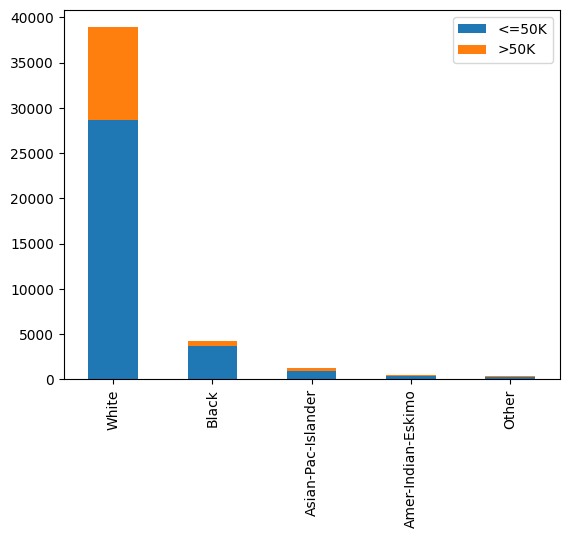

In [11]:
cols = ['race', 'count', 'income']
races = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
res_df = pd.DataFrame(columns=cols, dtype=object)

great_income = data[data['income'] == 1]
raw_subset = great_income[['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('race_ ', '')

races_great = subset.value_counts()

low_income = data[data['income'] == 0]
raw_subset = low_income[['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('race_ ', '')

races_low = subset.value_counts()

res_df = pd.DataFrame(
    {
        '<=50K': races_low,
        '>50K': races_great,
    },
    index=races
)

res_df.plot(kind='bar', stacked=True)
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')
plt.show()